<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/023%20-%20Lesson%2023%20(Meteorite%20Landings%20-%20Treating%20The%20Missing%20Values).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 23: Meteorite Landings - Treating The Missing Values

### Teacher-Student Activities

In the previous class, we learnt how to slice a DataFrame by some logical conditions and also by using the Ampersand logical operator to combine two conditions as part of the data cleaning step. In this class, we will continue with the data cleaning process so that later we can make cartograms and distribution plots.

While treating the missing values we need to keep in mind two things:

1. Whether it is really required to replace the missing values with some new most appropriate value. In some specific problem statements, the missing values itself act as a critical value.

2. The replaced value should not disrupt the original data otherwise, the actual results will get altered. Our logic of replacing the missing values with a new value must be consistent with the problem statement.

Let's quickly rush through the activities we covered in the previous class and begin this class from **Activity 1: Check For The Missing Values** section.



---

#### The Data

The dataset contains the following variables:

1. `name`: the name of the place where a meteorite was found or observed.

2. `id`: a unique identifier for a meteorite.

3. `nametype`: one of the following:
    
    - `valid`: a typical meteorite.
    
    - `relict`: a meteorite that has been highly degraded by the weather on Earth.

4. `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics.

5. `mass:` the mass of the meteorite, in grams

6. `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of the following:

    - `Fell`: the meteorite's fall was observed.
    
    - `Found`: the meteorite's fall was not observed.

7. `year`: the year the meteorite fell, or the year it was found (depending on the value of fell).

8. `reclat`: the latitude of the meteorite's landing.

9. `reclong`: the longitude of the meteorite's landing.

10. `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines `reclat` and `reclong` values.


---

#### Loading The Dataset

Dataset Link: https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [ ]:
# Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')
met_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
# Find the number of rows and columns in the DataFrame.
met_df.shape

(45716, 10)

---

#### The `describe()` Function


In [ ]:
# Descriptive statistics summary of the 'year' values in the 'met_df' DataFrame.
met_df['year'].describe()

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

---

#### Slicing A DataFrame And The Ampersand (`&`) Logical Operator

**Syntax:** `data_frame[condition1 & condition2 & condition3 ... conditionN]`

where `N` is the total number of conditions to be applied.


In [ ]:
# Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]
correct_years_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


---

#### Removing The Invalid `reclong` Values


In [ ]:
# Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]
correct_long_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


---

#### Removing The Rows Containing `0 N, 0 E` Values


In [ ]:
# Rows containing the 0 'reclat' and 0 'reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]
correct_lat_long_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


---

#### Activity 1: Check The Missing Values^^

So far we have removed all the unwanted values or rows. Now it's time to check whether we have any missing values or not. The missing values are generally reported as `NaN` values. We can find the rows or columns containing the `NaN` values using either the `isnull()` or the `isna()` function. They both return `True` for the `NaN` (or null or missing) values.

Let's first check whether any column has a missing value or not.

In [ ]:
# Student Action: Check whether the 'correct_lat_long_df' DataFrame has missing values or not using the 'isnull()' function.
correct_lat_long_df.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass           107
fall             0
year             0
reclat           0
reclong          0
GeoLocation      0
dtype: int64

So, there are 107 null values in the `mass` column. Let's also check for the same using the `isna()` function.

In [ ]:
# Student Action: Check whether the 'correct_lat_long_df' DataFrame has missing values or not using the 'isna()' function.
correct_lat_long_df.isna().sum()

name             0
id               0
nametype         0
recclass         0
mass           107
fall             0
year             0
reclat           0
reclong          0
GeoLocation      0
dtype: int64

Again, we can see that there are 107  missing values in the `correct_lat_long_df` DataFrame. Let's retrieve all the rows containing the missing values. For this,

- we will write the name of the variable storing the DataFrame followed by square brackets.

    ```
    correct_lat_long_df[]
    ```

- Inside the square brackets, we will use the `isnull()` function to get all the rows in which the `mass` value is `NaN`.

    ```
    correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True]
    ```

In [ ]:
# Student Action: Retrieve all the rows containing the missing 'mass' values in the 'correct_lat_long_df' DataFrame.
correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.666670, 2.333330)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.466670, -0.550000)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.366670, 2.166670)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.333330, -64.866670)"
172,Castel Berardenga,5292,Valid,Stone-uncl,NaN,Fell,1791.0,43.35000,11.50000,"(43.350000, 11.500000)"
...,...,...,...,...,...,...,...,...,...,...
31097,Palermo,18076,Valid,Unknown,NaN,Found,1966.0,-34.55000,-58.43333,"(-34.550000, -58.433330)"
36812,San Luis,23129,Valid,H,NaN,Found,1964.0,-33.33333,-66.38333,"(-33.333330, -66.383330)"
38278,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,1978.0,35.26667,104.31667,"(35.266670, 104.316670)"
41460,Yamato 792768,28117,Valid,CM2,NaN,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"


Because of the condition `correct_lat_long_df['mass'].isnull() == True`, the `correct_lat_long_df` DataFrame returns all the rows containing the `NaN` mass values.

We are not going to remove these rows. Instead, we will replace all the `NaN` values in the `mass` column with the median mass value because most of the `mass` values lie between the first and the third quartile values. The second quartile (or median) is a fair representative of the values lying in the inter-quartile range, i.e., $(Q3 - Q1)$.

More importantly, the quartile values remain unaffected by the unusually very high or very low values. In other words, the outliers do not affect the quartile values because they are computed by arranging all the values in the increasing order.

Now, let's get the descriptive statistics for the `mass` column in the `correct_lat_long_df` DataFrame.

In [ ]:
# Student Action: Get descriptive statistics for the 'mass' column in the 'correct_lat_long_df' DataFrame.
correct_lat_long_df['mass'].describe()

count    3.192900e+04
mean     1.854289e+04
std      6.868495e+05
min      0.000000e+00
25%      6.500000e+00
50%      2.960000e+01
75%      2.020000e+02
max      6.000000e+07
Name: mass, dtype: float64

The median `mass` value is `29.6` grams. We will replace all `NaN` values in the `mass` column with `29.6`. After replacement, all the above rows in the `mass` column should have `29.6` value.

---

#### Activity 2: The `index` Keyword

Let's create an array containing the indices of the rows having the `NaN` values in the `mass` column. To get an array containing the row indices of a whole DataFrame, use the `index` keyword of the Pandas module.

In [ ]:
# Teacher Action: Create a list of the indices of above rows.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

So, here we have an array containing the indices of all the rows having the `NaN` mass values. There are 107 such rows.

---

#### Activity 3: The `loc[]` Function^

Now, let's replace the missing `mass` values with the median of `mass` values. For this, we need to use the `loc[]` function from Pandas library. It is an extension to the `iloc[]` function. The `iloc[]` function takes only the row and column indices as inputs. But in addition to the row and column indices, the `loc[]` function also accepts the array of row indices and column indices as inputs. It also accepts the specific column names as inputs.

Let's create a Pandas series containing all the rows having the `NaN` mass values using the `loc[]` function. We will pass `row_indices` array and `mass` column as inputs to the `loc[]` function. Let's store the series obtained in the `missing_mass_values` variable.

In [ ]:
# Student Action: Retrieve the missing 'mass' values from 'correct_lat_long_df' DataFrame using the 'loc[]' function.
correct_lat_long_df.loc[row_indices, 'mass']

12      NaN
38      NaN
76      NaN
93      NaN
172     NaN
         ..
31097   NaN
36812   NaN
38278   NaN
41460   NaN
45698   NaN
Name: mass, Length: 107, dtype: float64

Here, we have a Pandas series which contains all the `NaN` mass values. The length of this series is `107`.

---

#### Activity 4: Replacing The Missing `mass` Values^^^

Now, let's replace the missing `mass` values in the 107 rows with the median of the `mass` values. Again, we will use the `loc[]` function for this exercise.

Using the `loc[]` function with `row_indices` and `mass` as inputs, we will get all the `NaN` values in the `mass` column. Then, using the `median()` function, we will get the median value which we are going to assign to the rows having the missing `mass` values in the `correct_lat_long_df`.

**Note:** Python will throw some warning after running the code below. Ignore it!

In [ ]:
# Teacher Action: Replace the missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_values = correct_lat_long_df['mass'].median()
median_values

29.6

In [ ]:
correct_lat_long_df.loc[row_indices, 'mass'] = median_values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Now, let's check whether all the missing mass values have been replaced by the median of the mass values or not. We can do this with the help of the `loc[]` function.

In [ ]:
# Student Action: Check whether all the missing mass values have been replaced by the median of the mass values or not.
correct_lat_long_df.loc[row_indices, 'mass']

12       29.6
38       29.6
76       29.6
93       29.6
172      29.6
         ... 
31097    29.6
36812    29.6
38278    29.6
41460    29.6
45698    29.6
Name: mass, Length: 107, dtype: float64

Each item in the `mass` column in the above DataFrame of 107 rows is `29.6` grams.

Let's confirm it by getting the descriptive statistics for the `mass` column in the above DataFrame using the `describe()` function. Except for the `std` and `count` values, all other values should be `29.6`. The `std` value should be very very close to `0` because every value will be the same as the mean value. The `count` value should be `107`.

In [ ]:
# Student Action: Create a descriptive statistics summary of the 'mass' column in the above DataFrame containing 107 rows.
correct_lat_long_df.loc[row_indices, 'mass'].describe()

count    107.0
mean      29.6
std        0.0
min       29.6
25%       29.6
50%       29.6
75%       29.6
max       29.6
Name: mass, dtype: float64

As expected, the `count` value is `107`, the `std` value is very close to `0` because $10^{-14}$ or $\frac{1}{10^{14}}$ is practically zero.

Now, let's get the descriptive statistics for the entire `mass` column in `correct_lat_long_df`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


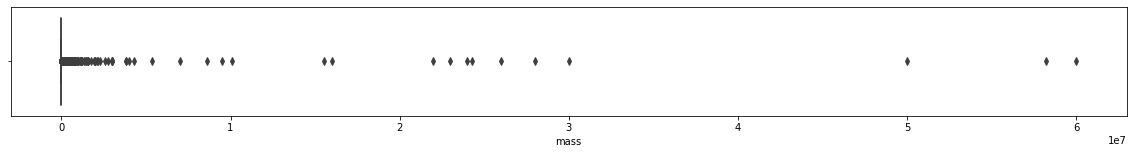

In [ ]:
# Student Action: Create a descriptive statistics summary of the 'mass' column in the 'correct_lat_long_df' DataFrame.
import seaborn as sns
correct_lat_long_df['mass'].describe()

plt.figure(figsize = (20,2))
sns.boxplot(correct_lat_long_df['mass'])
plt.show()

In [ ]:
correct_lat_long_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
correct_lat_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32036 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         32036 non-null  object 
 1   id           32036 non-null  int64  
 2   nametype     32036 non-null  object 
 3   recclass     32036 non-null  object 
 4   mass         32036 non-null  float64
 5   fall         32036 non-null  object 
 6   year         32036 non-null  float64
 7   reclat       32036 non-null  float64
 8   reclong      32036 non-null  float64
 9   GeoLocation  32036 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
correct_lat_long_df['year'].astype(int)

0        1880
1        1951
2        1952
3        1976
4        1902
         ... 
45711    1990
45712    1999
45713    1939
45714    2003
45715    1976
Name: year, Length: 32036, dtype: int64

In [ ]:
correct_lat_long_df['year'] = correct_lat_long_df['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
correct_lat_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32036 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         32036 non-null  object 
 1   id           32036 non-null  int64  
 2   nametype     32036 non-null  object 
 3   recclass     32036 non-null  object 
 4   mass         32036 non-null  float64
 5   fall         32036 non-null  object 
 6   year         32036 non-null  int64  
 7   reclat       32036 non-null  float64
 8   reclong      32036 non-null  float64
 9   GeoLocation  32036 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.7+ MB


In [ ]:
correct_lat_long_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
correct_lat_long_df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

As you can see there is no major change in the `std, min, 25%, 50%, 75%` and `max` values. They all are the same which is how it should be. **Treatment of the missing values should not affect the original dataset drastically.**

In the next class, we will take a pause from the data cleaning process and learn the basics of cartograms. In the subsequent class, we will create cartograms for the meteorite landing sites on Earth.

---